<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_OB/blob/main/11%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 08. 파이썬 추천 시스템 패키지 - Surprise

### Surprise 패키지 소개

In [2]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163480 sha256=69aa20a66fd9774ff61e181089101f27499f4232ec2d48c4aff805457ff950ee
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


주요 장점
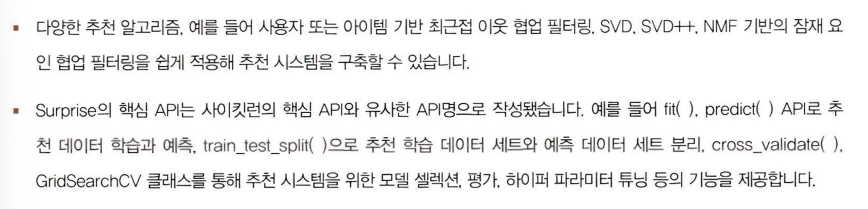

### Surprise를 이용한 추천 시스템 구축

In [4]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

- Surprise에서 데이터 로딩은 Dataset 클래스를 이용해서만 가능
- 로우 레벨 형태로 돼있는 포맷의 데이터만 처리

In [5]:
data = Dataset.load_builtin('ml-100k')
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25,random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


Surprise는 자체적으로 로우 레벨의 데이터를 칼럼 레벨의 데이터로 변경하므로 원본인 로우 레벨의 사용자-아이템 평점 데이터를 데이터 세트로 적용해야 함

In [6]:
algo = SVD()
algo.fit(trainset)

In [7]:
predictions = algo.test(testset)
print('prediction type :', type(predictions), ' size:', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.3589225414081767, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.648624999572631, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=3.972473966964565, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.4840274905416035, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.336841488324799, details={'was_impossible': False})]

In [8]:
[ (pred.uid, pred.iid, pred.est ) for pred in predictions[:3]]

[('120', '282', 3.3589225414081767),
 ('882', '291', 3.648624999572631),
 ('535', '507', 3.972473966964565)]

In [9]:
# 예측 메서드인 predict()를 이용해 추천 예측
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함.
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.27   {'was_impossible': False}


test() 메서드는 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해서 predict()를 반복적으로 수행한 결과

In [10]:
accuracy.rmse(predictions)

RMSE: 0.9493


0.9493115618365443

### Surprise 주요 모듈 소개

- Dataset
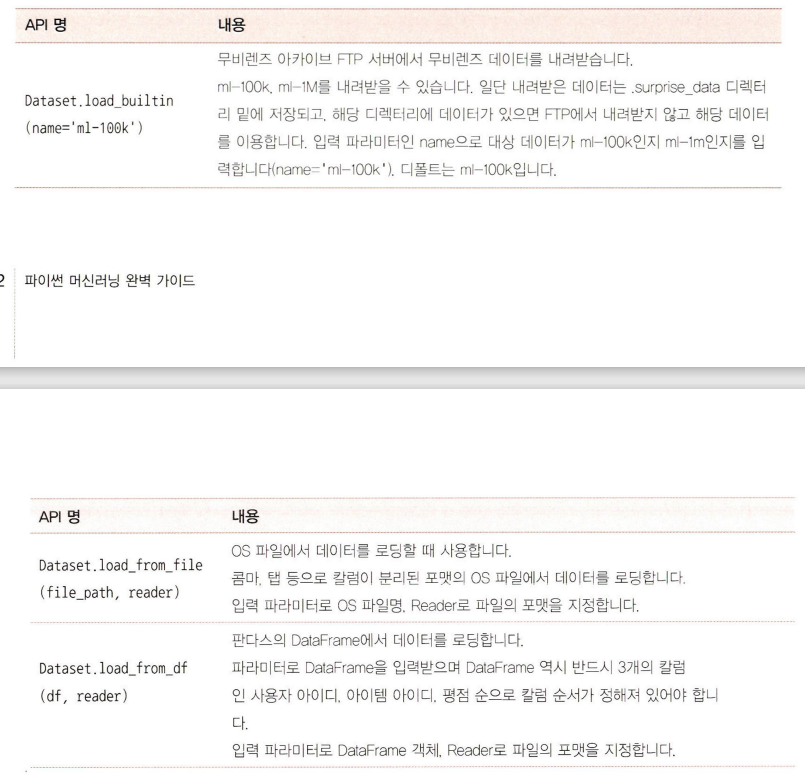

### OS 파일 데이터를 Surprise 데이터 세트로 로딩

In [13]:
import pandas as pd

ratings = pd.read_csv('/content/sample_data/ratings.csv')
# ratings_noh.csv 파일로 언로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성.
ratings.to_csv('/content/sample_data/ratings_noh.csv', index=False, header=False)

In [16]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
data=Dataset.load_from_file('/content/sample_data/ratings_noh.csv',reader=reader)

- Reader 클래스의 주요 생성 파라미터
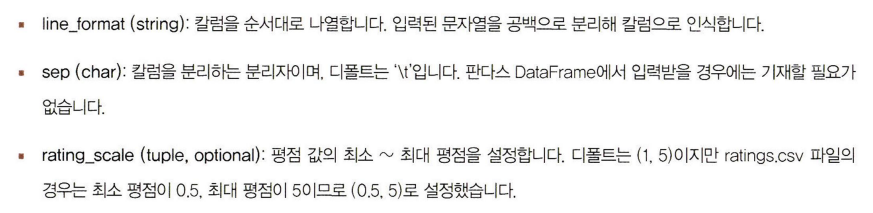

In [17]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행 시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8708


0.8708344753692029

### 판다스 DataFrame에서 Surprise 데이터 세트로 로딩

In [22]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/sample_data/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### Surprise 추천 알고리즘 클래스

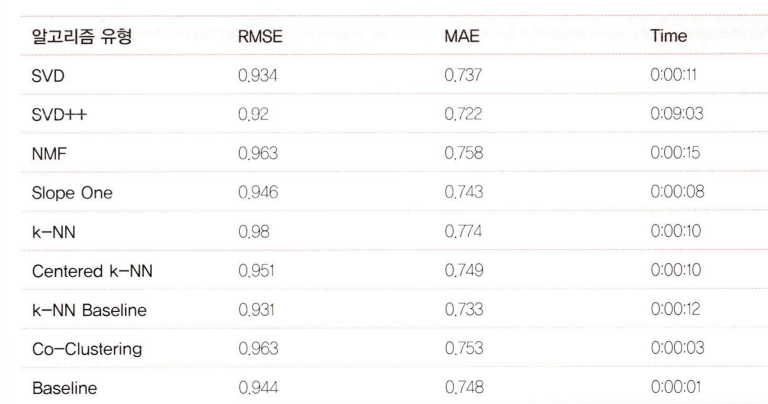

### 베이스라인 평점
- 개인의 성향을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것
- 전체 평균 평점 + 사용자 편향 점수 + 아이템 평향 점수
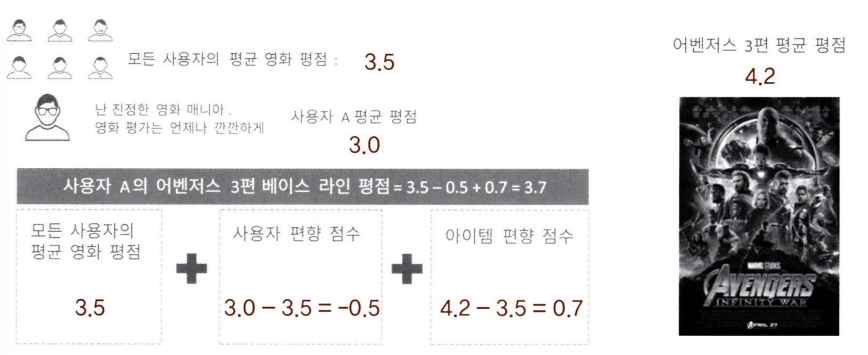

### 교차 검증과 하이퍼 파라미터 튜닝

In [23]:
from surprise.model_selection import cross_validate

# 판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩
ratings = pd.read_csv('/content/sample_data/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE','MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8732  0.8688  0.8729  0.8682  0.8758  0.8718  0.0028  
MAE (testset)     0.6708  0.6676  0.6707  0.6663  0.6736  0.6698  0.0026  
Fit time          2.93    1.95    1.60    1.55    1.55    1.92    0.53    
Test time         0.22    0.13    0.13    0.14    0.13    0.15    0.04    


{'test_rmse': array([0.87317896, 0.86882684, 0.87290658, 0.86824995, 0.87575718]),
 'test_mae': array([0.67084643, 0.66762588, 0.67073693, 0.66631186, 0.67361284]),
 'fit_time': (2.9336485862731934,
  1.9486238956451416,
  1.5971839427947998,
  1.5473718643188477,
  1.5482313632965088),
 'test_time': (0.22063088417053223,
  0.12685894966125488,
  0.13376474380493164,
  0.14151239395141602,
  0.12807416915893555)}

In [24]:
# SVD의 경우 주로 점진적 하강 방식의 반복 횟루를 지정하는 n_epochs와 SVD의 잠재 요인 K의 크기를 지정하는 n_factors를 튜닝
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터를 딕셔너리 형태로 지정.
param_grid = {'n_epochs':[20,40,60], 'n_factors':[50,100,200]}
# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8766150477920861
{'n_epochs': 20, 'n_factors': 50}


### Surprise를 이용한 개인화 영화 추천 시스템 구축

In [25]:
# 다음 코드는 train_test_split()으로 분리되지 않은 데이터 세트에 fit()을 호출해 오류가 발생합니다.
data=Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo=SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

In [26]:
# 데이터 세트 전체를 학습 데이터로 사용하는 방법
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
data_folds = DatasetAutoFolds(ratings_file = '/content/sample_data/ratings_noh.csv',reader=reader)

# 전체 데이터를 학습 데이터로 생성함.
trainset = data_folds.build_full_trainset()

In [27]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

사용자가 평점을 매기지 않은 영화의 추천 예측 평점을 간단하게 구하는 방법

In [29]:
# 영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/sample_data/movies.csv')

# userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인.
movieIds = ratings[ratings['userId']==9]['movieId']

if movieIds[movieIds==42].count()==0:
  print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [30]:
# 추천 예상 평점
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose = True)

user: 9          item: 42         r_ui = None   est = 3.10   {'was_impossible': False}


est = 3.13

In [31]:
def get_unseen_surprise(ratings, movies, userId):
  # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
  seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()

  # 모든 영화의 movieId를 리스트로 생성.
  total_movies = movies['movieId'].tolist()

  # 모든 영화의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
  unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
  print('평점 매긴 영화 수:', len(seen_movies), '추천 대상 영화 수:', len(unseen_movies),
        '전체 영화 수:',len(total_movies))

  return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742


In [32]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):

  # 알고리즘 객체의 predict() 메서드를 평점이 없는 연화에 반복 수행한 후 결과를 list 객체로 저장
  precictions = [algo.predict(str(userId),str(movieId)) for movieId in unseen_movies]

  # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
  # [Prediction(uid='9', iid='1', est=3.69), Predictions(uid='9', iid='2', est=2.98),,,,]

  # 이를 est 값으로 정렬하기 위해 아리애 sortkey_est 함수 정의
  # sortdey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행
  def sortkey_est(pred):
    return pred.est

  # sortkey_est() 반환값의 내림차순으로 정렬 수행하고 top_n개의 최상위 값 추출
  predictions.sort(key=sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  # top_n 으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
  top_movie_ids = [int(pred.iid) for pred in top_predictions]
  top_movie_rating = [pred.est for pred in top_predictions]
  top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']

  top_movie_preds = [(id, title, rating) for id, title, rating in \
                     zip(top_movie_ids, top_movie_titles, top_movie_rating)]

  return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('##### Top-10 추천 영화 리스트 #####')
for top_movie in top_movie_preds:
  print(top_movie[1],":",top_movie[2])

평점 매긴 영화 수: 46 추천 대상 영화 수: 9696 전체 영화 수: 9742
##### Top-10 추천 영화 리스트 #####
Star Wars: Episode IV - A New Hope (1977) : 5.0
Aladdin (1992) : 5.0
Brazil (1985) : 5.0
Cool Hand Luke (1967) : 5.0
Matrix, The (1999) : 5.0
Fight Club (1999) : 5.0
Snatch (2000) : 5.0
Lord of the Rings: The Two Towers, The (2002) : 5.0
Finding Nemo (2003) : 5.0
Django Unchained (2012) : 5.0
